<a href="https://colab.research.google.com/github/7rdudd/dhvmsthtm/blob/main/230404%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#데이터셋
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
(x_train,t_train), (x_test,t_test)=cifar10.load_data()
batch_size=32
epochs=20
n_class=10
x_train=x_train/255
x_test=x_test/255
t_train=tf.keras.utils.to_categorical(t_train,n_class)
t_test=tf.keras.utils.to_categorical(t_test,n_class)

In [8]:
from keras.api._v2.keras import Sequential
#
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.optimizers import Adam
model=Sequential()

In [10]:
model.add(Conv2D(32,(3,3), padding="same",input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding="same"))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

In [12]:
from keras.engine.training import optimizer
model.add(Flatten()) #1차원 배열로 변환
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(n_class))
model.add(Activation("softmax"))
model.compile(optimizer=Adam(),loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                      

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(rotation_range=0.2, horizontal_flip=True)
history=model.fit_generator(generator.flow(x_train,t_train,
                                           batch_size=batch_size),
                            epochs=epochs,validation_data=(x_test,
                                                           t_test))

Epoch 1/20


<ipython-input-13-ea6a82aa9e2f>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator.flow(x_train,t_train,


1563/1563 [==============================] - 46s 22ms/step - loss: 1.8512 - accuracy: 0.2804 - val_loss: 1.5096 - val_accuracy: 0.4229
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4248 - accuracy: 0.4693 - val_loss: 1.2152 - val_accuracy: 0.5517
Epoch 3/20
1563/1563 [==============================] - 34s 21ms/step - loss: 1.2095 - accuracy: 0.5672 - val_loss: 1.0705 - val_accuracy: 0.6202
Epoch 4/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.0882 - accuracy: 0.6142 - val_loss: 1.0092 - val_accuracy: 0.6448
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0091 - accuracy: 0.6482 - val_loss: 0.9141 - val_accuracy: 0.6745
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9452 - accuracy: 0.6707 - val_loss: 0.8831 - val_accuracy: 0.6964
Epoch 7/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9096 - accuracy: 0.6850 - val_loss: 0.8546 - val_accura

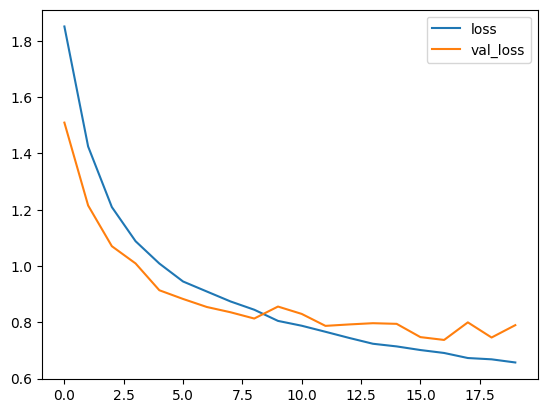

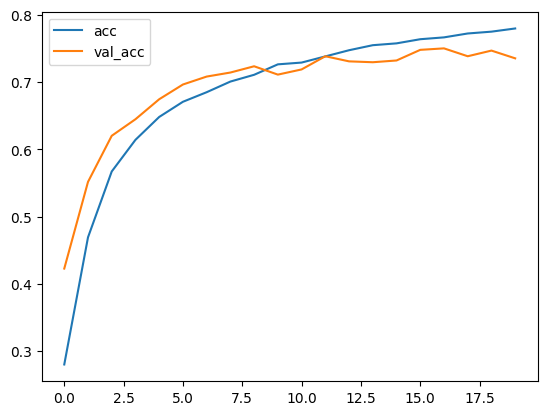

In [14]:
import matplotlib.pyplot as plt #결과
train_loss=history.history['loss']
train_acc=history.history['accuracy']
val_loss=history.history['val_loss']
val_acc=history.history['val_accuracy']
plt.plot(np.arange(len(train_loss)), train_loss, label='loss')
plt.plot(np.arange(len(val_loss)), val_loss, label='val_loss')
plt.legend()
plt.show()
plt.plot(np.arange(len(train_acc)), train_acc, label='acc')
plt.plot(np.arange(len(val_acc)), val_acc, label='val_acc')
plt.legend()
plt.show()

In [15]:
loss, accuracy=model.evaluate(x_test,t_test)
print("오차:",loss,"정밀도:",accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.7901 - accuracy: 0.7353
오차: 0.7900668978691101 정밀도: 0.7353000044822693


In [16]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [17]:
import os
from keras.models import load_model
path="/content/drive/MyDrive/cnn_cifar10/" #폴더 만들기
#디렉터리 작성성
if not os.path.exists(path):
  os.makedirs(path)
#파일 저장
model.save(path+"model_cnn_cifar10.h5")